### Approximating a non-differentiable function by a neural network

Let's check whether a neural network can approximate a non-differentiable function. A classic simple example of such a function is the absolute value function, which is non-differentiable at zero.

We'll design a neural network in PyTorch to learn to approximate this function based on a dataset generated from the absolute value function with some added noise to simulate real-world data imperfections.

In [1]:
# Step 1: Import Required Libraries

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 2: Generate Synthetic Data

# Generate input data: 1000 points between -2 and 2
x = np.linspace(-2, 2, 1000)
# Generate output data: absolute value of each point with 
# some added Gaussian noise with a mean of 0 and a standard deviation of 0.1 to each point
y = np.abs(x) + np.random.normal(0, 0.1, 1000)

# Convert data to PyTorch tensors
X = torch.tensor(x, dtype=torch.float32).view(-1, 1)
Y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [3]:
# Step 3: Define the Neural Network Model

class AbsApproximator(nn.Module):
    def __init__(self):
        super(AbsApproximator, self).__init__()
        self.fc1 = nn.Linear(1, 64)  # Input layer to hidden layer
        self.fc2 = nn.Linear(64, 64)  # Hidden layer to another hidden layer for complexity
        self.fc3 = nn.Linear(64, 1)  # Hidden layer to output layer
        self.relu = nn.ReLU()  # Using ReLU activation function

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [4]:
# Step 4: Train the Model

# Initialize the model, loss function, and optimizer
model = AbsApproximator()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, Y)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.0100
Epoch [200/1000], Loss: 0.0097
Epoch [300/1000], Loss: 0.0096
Epoch [400/1000], Loss: 0.0096
Epoch [500/1000], Loss: 0.0096
Epoch [600/1000], Loss: 0.0096
Epoch [700/1000], Loss: 0.0095
Epoch [800/1000], Loss: 0.0095
Epoch [900/1000], Loss: 0.0095
Epoch [1000/1000], Loss: 0.0095


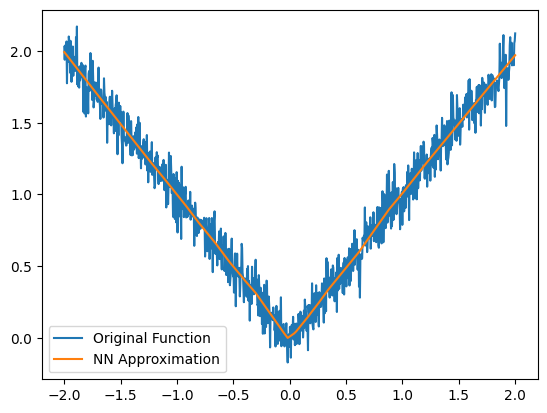

In [5]:
# Step 5: Visualize the Results

# Visualize the original function and the approximation
predicted = model(X).detach().numpy()
plt.plot(x, y, label='Original Function')
plt.plot(x, predicted, label='NN Approximation')
plt.legend()
plt.show()
